In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


In [11]:
df = pd.read_csv("heart.csv")
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [112]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
x = df.drop("target" ,axis=1)
y = df["target"]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log_model =LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\prran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
def model_eval(model,x,y):
    
    y_pred = model.predict(x)
    
    acc = accuracy_score(y,y_pred)
    print(f"Accuracy Score = {acc}")
    
    con = confusion_matrix(y,y_pred)
    print(f"Confusion Matrix = \n{con}")
    
    cla = classification_report(y,y_pred)
    print(f"Classification Report = \n{cla}")
    
    return "success"

In [18]:
model_eval(log_model,x_train,y_train)

Accuracy Score = 0.8679245283018868
Confusion Matrix = 
[[ 77  20]
 [  8 107]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        97
           1       0.84      0.93      0.88       115

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.87       212
weighted avg       0.87      0.87      0.87       212



'success'

In [19]:
model_eval(log_model,x_test,y_test)

Accuracy Score = 0.8241758241758241
Confusion Matrix = 
[[27 14]
 [ 2 48]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.93      0.66      0.77        41
           1       0.77      0.96      0.86        50

    accuracy                           0.82        91
   macro avg       0.85      0.81      0.81        91
weighted avg       0.84      0.82      0.82        91



'success'

# KNN 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
x_scale = df.drop("target",axis=1)
y = df["target"]

## Scaling

In [22]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scal_knn_model = MinMaxScaler()
x_new_scale = scal_knn_model.fit_transform(x_scale)
df_x = pd.DataFrame(x_new_scale,columns=x.columns)
df_x

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [23]:
x_train,x_test,y_train,y_test = train_test_split(df_x,y , test_size=0.3,random_state=4,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [24]:
k_model = KNeighborsClassifier()
k_model.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
model_eval(k_model,x_train,y_train)

Accuracy Score = 0.8773584905660378
Confusion Matrix = 
[[ 83  14]
 [ 12 103]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        97
           1       0.88      0.90      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



'success'

In [26]:
model_eval(k_model,x_test,y_test)

Accuracy Score = 0.7802197802197802
Confusion Matrix = 
[[29 12]
 [ 8 42]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        41
           1       0.78      0.84      0.81        50

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91



'success'

In [27]:
df = pd.read_csv("heart.csv")
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
x = df.drop("target",axis=1)
y = df["target"]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.3,random_state=4,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

# DT_Gini Model

In [30]:
model = DecisionTreeClassifier(random_state=8)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=8)

In [31]:
model_eval(model,x_train,y_train)

Accuracy Score = 1.0
Confusion Matrix = 
[[ 97   0]
 [  0 115]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



'success'

In [32]:
model_eval(model,x_test,y_test)

Accuracy Score = 0.7472527472527473
Confusion Matrix = 
[[31 10]
 [13 37]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        41
           1       0.79      0.74      0.76        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



'success'

## 1) Hyper parameter Tunning

In [33]:
hy_model = DecisionTreeClassifier(random_state=12)
hyper = {
    "criterion":['gini','entropy'],
    "max_depth":np.arange(3,10),
    "min_samples_split":np.arange(2,10),
    "min_samples_leaf":np.arange(1,7),
}

gscv = GridSearchCV(hy_model,hyper)
gscv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [34]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=12)

In [35]:
hy_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,random_state=12)
hy_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=12)

In [36]:
model_eval(hy_model,x_train,y_train)

Accuracy Score = 0.8490566037735849
Confusion Matrix = 
[[81 16]
 [16 99]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        97
           1       0.86      0.86      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



'success'

In [37]:
model_eval(hy_model,x_test,y_test)

Accuracy Score = 0.7802197802197802
Confusion Matrix = 
[[30 11]
 [ 9 41]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



'success'

# Low bais && High Varience  >> Overfitting

# 2) Post Prunning

In [38]:
ccps = model.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas']
ccps

array([0.        , 0.00308532, 0.00377358, 0.0043239 , 0.0043239 ,
       0.00435414, 0.00446905, 0.00459906, 0.00628931, 0.00637684,
       0.0067947 , 0.00731737, 0.00733753, 0.00786164, 0.00885918,
       0.00953622, 0.0107402 , 0.01341719, 0.01513926, 0.01548504,
       0.01605084, 0.02192807, 0.02505935, 0.0354572 , 0.13775011])

In [39]:
train_acc ,test_acc = [],[]

for ccp in ccps:
    p_model = DecisionTreeClassifier(random_state=5,ccp_alpha=ccp)
    p_model.fit(x_train,y_train)
    
    train_acc.append(p_model.score(x_train,y_train))
    test_acc.append(p_model.score(x_test,y_test))

In [40]:
train_acc

[1.0,
 0.9952830188679245,
 0.9905660377358491,
 0.9811320754716981,
 0.9811320754716981,
 0.9764150943396226,
 0.9716981132075472,
 0.9669811320754716,
 0.9622641509433962,
 0.9481132075471698,
 0.9386792452830188,
 0.9339622641509434,
 0.9245283018867925,
 0.9198113207547169,
 0.910377358490566,
 0.9056603773584906,
 0.8915094339622641,
 0.8773584905660378,
 0.839622641509434,
 0.8349056603773585,
 0.8113207547169812,
 0.8113207547169812,
 0.7641509433962265,
 0.7641509433962265,
 0.5424528301886793]

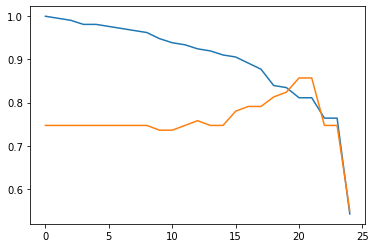

In [41]:
plt.plot(train_acc)
plt.plot(test_acc)

In [42]:
max(test_acc)

0.8571428571428571

In [43]:
max_index = np.argmax(test_acc)
max_index

20

In [44]:
train_acc[max_index]

0.8113207547169812

In [45]:
ccps[20]

0.01605083857442348

In [46]:
prun_model = DecisionTreeClassifier(random_state=9,ccp_alpha=0.01605083857442348)
prun_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01605083857442348, random_state=9)

In [47]:
model_eval(prun_model,x_train,y_train)

Accuracy Score = 0.8113207547169812
Confusion Matrix = 
[[ 67  30]
 [ 10 105]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.87      0.69      0.77        97
           1       0.78      0.91      0.84       115

    accuracy                           0.81       212
   macro avg       0.82      0.80      0.81       212
weighted avg       0.82      0.81      0.81       212



'success'

In [48]:
model_eval(prun_model,x_test,y_test)

Accuracy Score = 0.8571428571428571
Confusion Matrix = 
[[28 13]
 [ 0 50]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        41
           1       0.79      1.00      0.88        50

    accuracy                           0.86        91
   macro avg       0.90      0.84      0.85        91
weighted avg       0.89      0.86      0.85        91



'success'

## 3) Ensemble Method >> Bagging  >> Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

In [50]:
rf_model = RandomForestClassifier(random_state=3)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=3)

In [51]:
model_eval(rf_model,x_train,y_train)

Accuracy Score = 1.0
Confusion Matrix = 
[[ 97   0]
 [  0 115]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



'success'

In [52]:
model_eval(rf_model,x_test,y_test)

Accuracy Score = 0.8571428571428571
Confusion Matrix = 
[[33  8]
 [ 5 45]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



'success'

### Random Forest Hyperparameter tunning

# Randomsearch CV

In [53]:
rf_hy_model = RandomForestClassifier(random_state=7 ,oob_score=True,n_jobs=3)
hyper = {
    "n_estimators" : np.arange(10,100,10),
    "criterion" : ['gini','entropy'],
    "max_depth" : np.arange(3,12),
    "min_samples_split" :np.arange(2,9),
    "min_samples_leaf" : np.arange(1,8),
}

rscv = RandomizedSearchCV(rf_hy_model,hyper)
rscv.fit(x_train,y_train)

C:\Users\prran\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\prran\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\prran\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\prran\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\prran\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=3, oob_score=True,
                                                    random_state=7),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [54]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=40, n_jobs=3,
                       oob_score=True, random_state=7)

In [55]:
rscv_model = rscv.best_estimator_
rscv_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=40, n_jobs=3,
                       oob_score=True, random_state=7)

In [56]:
model_eval(rscv_model,x_train,y_train)

Accuracy Score = 0.9198113207547169
Confusion Matrix = 
[[ 83  14]
 [  3 112]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        97
           1       0.89      0.97      0.93       115

    accuracy                           0.92       212
   macro avg       0.93      0.91      0.92       212
weighted avg       0.92      0.92      0.92       212



'success'

In [57]:
model_eval(rscv_model,x_test,y_test)

Accuracy Score = 0.9120879120879121
Confusion Matrix = 
[[36  5]
 [ 3 47]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.90      0.94      0.92        50

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



'success'

In [98]:
data = {
    "Model" :["Logistic Classification","KNN Classification","DT_Gini Model" , "DT_Entropy Model(Hyperparameter)" , "DT_Post Prunning Model" , "Random Forest Model" , "Random Forest Model (rscv)",],
    "Training Accuracy" : [0.86,0.88,1.0,0.85,0.81,1.0,0.92,],
    "Testing Accuracy" : [0.82,0.78,0.74,0.78,0.86,0.86,0.91,],
    "Bais & Varience TradeOff" : ["Underfitting Model","Generalize Model","Overfitting Model","Overfitting Model","Overfitting Model","Overfitting Model","Generalize Model [Best Model]"]}
result = pd.DataFrame(data , columns=["Model" , "Training Accuracy" , "Testing Accuracy" , "Bais & Varience TradeOff"])
result

,Model,Training Accuracy,Testing Accuracy,Bais & Varience TradeOff
0,Logistic Classification,0.86,0.82,Underfitting Model
1,KNN Classification,0.88,0.78,Generalize Model
2,DT_Gini Model,1.00,0.74,Overfitting Model
3,DT_Entropy Model(Hyperparameter),0.85,0.78,Overfitting Model
4,DT_Post Prunning Model,0.81,0.86,Overfitting Model
5,Random Forest Model,1.00,0.86,Overfitting Model
6,Random Forest Model (rscv),0.92,0.91,Generalize Model [Best Model]


In [99]:
import pickle
import json

In [100]:
with open("rf_model.pkl","wb") as file:
    pickle.dump(rscv_model,file)

In [104]:
column = {"columns" : x.columns.to_list()}
print(column)

with open("columns.json","w") as file:
    json.dump(column,file)

{'columns': ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']}
